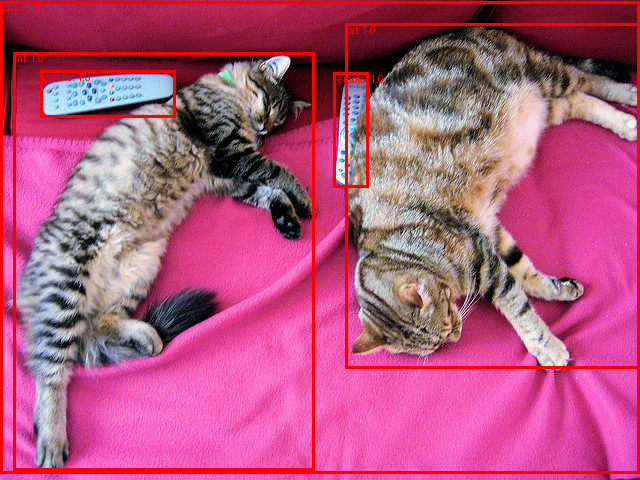

In [2]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image, ImageDraw
import requests

# Load the image
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# Load processor and model (without timm dependency)
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

# Prepare inputs and get model outputs
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# Process the outputs to get bounding boxes and labels with a threshold of 0.9
target_sizes = torch.tensor([image.size[::-1]])  # image.size returns (width, height)
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

# Draw the bounding boxes on the image
draw = ImageDraw.Draw(image)

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]  # Get the bounding box coordinates
    # Draw rectangle on the image
    draw.rectangle(box, outline="red", width=3)
    # Annotate the image with the detected label and score
    draw.text((box[0], box[1]), f"{model.config.id2label[label.item()]}: {round(score.item(), 2)}", fill="red")

# Display the image with bounding boxes
image.show()
